In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
#--- Web scriping ---
import requests
from bs4 import BeautifulSoup
#--- ------------ ---
from datetime import datetime, date, timedelta
from googletrans import Translator 

# <font style="font-size: 80px"><font color="yellow">C</font><font style="color: whitesmoke">onsume </font><font color="yellow">P</font><font style="color: whitesmoke">roduct </font><font color="yellow">I</font><font style="color: whitesmoke">ndex </font>(<font color="yellow">CPI</font>)</font>

In [2]:
#Inflation = pd.read_excel("D:\Programacion proyectos\Data proyect\CSV crudo\InflationWorld.xlsx")
excel = "../../CSV crudo/InflationWorld.xlsx"
sheets = openpyxl.load_workbook(excel) #r"C:\Users\matia\OneDrive\Documentos\GitHub\Inflation-data\CSV crudo\InflationWorld.xlsx"

In [3]:
print(sheets.sheetnames)

['Intro', 'top', 'hcpi_m', 'hcpi_q', 'hcpi_a', 'ecpi_m', 'ecpi_q', 'ecpi_a', 'fcpi_m', 'fcpi_q', 'fcpi_a', 'ccpi_m', 'ccpi_q', 'ccpi_a', 'ppi_m', 'ppi_q', 'ppi_a', 'def_q', 'def_a', 'ccpi_m_e', 'ccpi_q_e', 'ccpi_a_e', 'hcpi_q_t', 'hcpi_q_c', 'Aggregate']


---

### <font style="color: yellow">Columns</font>

In [4]:
CPIa = pd.read_excel(excel, sheet_name="hcpi_a")

CPIa.drop(columns=["Note", "IMF Country Code", "Indicator Type", "Series Name"], inplace=True)
CPIa.rename(columns={"Country Code":"Code"}, inplace=True)
CPIa[["Code", "Country"]] = CPIa[["Country", "Code"]]
CPIa.rename(columns={"Code":"Country", "Country":"Code"}, inplace=True) #If the name not exist previously to the function are not changed

In [5]:
CPIa.columns = CPIa.columns.astype(str)

In [6]:
len(CPIa["Country"])

206

In [7]:
countryCount = {}
for i in CPIa["Country"]:
    if countryCount.get(i):
        countryCount[i] += 1
    else:
        countryCount[i] = 1

country_repeat = {k: v for k, v in countryCount.items() if(v>=2)}
print(country_repeat)

{nan: 3}


In [8]:
CPIa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 55 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  203 non-null    object 
 1   Code     204 non-null    object 
 2   1970     155 non-null    float64
 3   1971     155 non-null    float64
 4   1972     155 non-null    float64
 5   1973     156 non-null    float64
 6   1974     156 non-null    float64
 7   1975     154 non-null    float64
 8   1976     154 non-null    float64
 9   1977     154 non-null    float64
 10  1978     155 non-null    float64
 11  1979     155 non-null    float64
 12  1980     158 non-null    float64
 13  1981     162 non-null    float64
 14  1982     163 non-null    float64
 15  1983     163 non-null    float64
 16  1984     163 non-null    float64
 17  1985     163 non-null    float64
 18  1986     164 non-null    float64
 19  1987     165 non-null    float64
 20  1988     165 non-null    float64
 21  1989     165 non

---

### <font style="color: yellow"> This data-frame have something wrong elements? </font>

In [9]:
nanCountry = CPIa[CPIa["Country"].isna() == True]
CPIa.drop(index=nanCountry.index, inplace=True)
CPIa.reset_index(inplace=True, drop=True)

In [10]:
#CPIa.loc[CPIa["Country"] == "Angola", "1970"] = "Hello"
aux = CPIa.iloc[:, 2:]
dataFilter = aux.select_dtypes(exclude=["float"]).any()
dataFilter

Series([], dtype: bool)

---

### <font style="color: yellow"> Sorting the data </font>

In [11]:
nanPorcent = {}
noData = []
for i in CPIa["Country"]:
    rowSelected = CPIa[CPIa["Country"] == i]
    if(rowSelected.isna().any().any()):
        nanPorcent[i] = rowSelected.iloc[:, 2:].isna().any().value_counts(normalize=True)[True]
        if(nanPorcent[i] == 1):
            noData.append(int(rowSelected.index.values[0]))
    else:
        nanPorcent[i] = 0.0

print(nanPorcent, "\n", noData)

#--- Del data ---#
for i in range(0, len(noData)):
    del nanPorcent[CPIa.iloc[noData[i]]["Country"]]
CPIa.drop(index=noData, inplace=True)
CPIa.reset_index(inplace=True, drop=True)

{'Aruba': 0.49056603773584906, 'Afghanistan': 0.018867924528301886, 'Angola': 0.0, 'Albania': 0.37735849056603776, 'United Arab Emirates': 0.0, 'Argentina': 0.0, 'Armenia': 0.4339622641509434, 'Antigua and Barbuda': 0.0, 'Australia': 0.0, 'Austria': 0.0, 'Azerbaijan': 0.39622641509433965, 'Burundi': 0.0, 'Belgium': 0.0, 'Benin': 0.0, 'Burkina Faso': 0.0, 'Bangladesh': 0.0, 'Bulgaria': 0.0, 'Bahrain': 0.0, 'Bahamas, The': 0.0, 'Bosnia and Herzegovina': 0.4716981132075472, 'Belarus': 0.0, 'Belize': 0.0, 'Bolivia': 0.0, 'Brazil': 0.0, 'Barbados': 0.0, 'Brunei Darussalam': 0.0, 'Bhutan': 0.05660377358490566, 'Botswana': 0.0, 'Central African Republic': 0.0, 'Cayman Islands': 0.49056603773584906, 'Canada': 0.0, 'Switzerland': 0.0, 'Chile': 0.0, 'China': 0.0, "Côte d'Ivoire": 0.0, 'Cameroon': 0.0, 'Congo, Dem. Rep.': 0.0, 'Congo, Rep.': 0.0, 'Colombia': 0.0, 'Comoros': 0.0, 'Cabo Verde': 0.0, 'Costa Rica': 0.0, 'Curacao': 0.11320754716981132, 'Cyprus': 0.0, 'Czech Republic': 0.0, 'Germany': 

In [12]:
nanPorcent = dict(sorted(nanPorcent.items(), key=lambda items: items[1], reverse=False))
newOrder = [x for x in nanPorcent]
aux_df = pd.DataFrame(columns=CPIa.columns)

for i in newOrder:
    rowSelected = CPIa[CPIa["Country"] == i]
    aux_df = pd.concat([aux_df, rowSelected], ignore_index=True)

aux_df = aux_df.round(2)
CPIa =  aux_df
CPIa

/var/folders/r3/_0ct4tcx0jj4q9jfbhwjb93m0000gn/T/ipykernel_8644/1748395857.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  aux_df = pd.concat([aux_df, rowSelected], ignore_index=True)


,Country,Code,1970,1971,1972,1973,1974,1975,1976,1977,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Angola,AGO,7.97,5.78,15.80,15.67,27.42,29.00,80.70,69.01,...,8.78,7.30,9.16,32.38,29.84,19.63,17.08,21.02,23.85,21.35
1,United Arab Emirates,ARE,21.98,21.98,21.98,21.98,21.98,21.98,21.98,21.97,...,1.09,2.34,4.07,1.62,1.97,3.06,-1.93,-2.08,0.18,5.22
2,Argentina,ARG,13.59,34.73,58.45,61.25,23.47,182.93,443.97,176.00,...,10.62,38.08,26.54,39.40,25.68,34.28,53.55,42.02,48.41,72.43
3,Antigua and Barbuda,ATG,8.87,8.63,12.67,21.72,12.97,8.61,15.62,13.75,...,1.06,1.09,0.97,-0.49,2.42,1.21,1.48,1.06,1.63,8.52
4,Australia,AUS,3.44,6.14,6.02,9.09,15.42,15.16,13.32,12.31,...,2.45,2.49,1.51,1.28,1.97,1.91,1.61,0.85,2.82,6.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Timor-Leste,TLS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.99,0.85,0.65,-1.47,0.52,2.29,0.96,NaN,NaN,NaN
197,Turks and Caicos Islands,TCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.50,2.30,2.20,2.00,2.10,2.10,2.20,2.30,NaN,NaN
198,South Sudan,SSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.04,1.66,52.81,379.85,187.87,83.49,51.19,29.68,30.23,17.60
199,Liechtenstein,LIE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.30,0.00,-1.11,-0.41,0.51,0.92,0.40,-0.70,0.51,2.83


---

# <font>Argentina compare between <font style="color: yellow">worlddata.info</font> and <font style="color: yellow">data.worldbank.org</font></font>

In [13]:
argentinaInf1 = CPIa[CPIa["Country"] == "Argentina"]

#************ WEB scriping ************#
url = "https://www.datosmundial.com/america/argentina/inflacion.php" # English: "https://www.worlddata.info/america/argentina/inflation-rates.php" Spanish: "https://www.datosmundial.com/america/argentina/inflacion.php"
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')

In [14]:
tr_items = soup.find_all('div', class_="tablescroller")[0].find_all('td')
print(tr_items)

[<td>2022</td>, <td>94,80 %</td>, <td>8,83 %</td>, <td>8,00 %</td>, <td>7,97 %</td>, <td>2021</td>, <td>48,41 %</td>, <td>2,55 %</td>, <td>4,70 %</td>, <td>3,47 %</td>, <td>2020</td>, <td>42,02 %</td>, <td>0,48 %</td>, <td>1,23 %</td>, <td>1,94 %</td>, <td>2019</td>, <td>53,55 %</td>, <td>1,63 %</td>, <td>1,81 %</td>, <td>2,21 %</td>, <td>2018</td>, <td>34,28 %</td>, <td>1,74 %</td>, <td>2,44 %</td>, <td>2,44 %</td>, <td>2017</td>, <td>25,68 %</td>, <td>1,43 %</td>, <td>2,13 %</td>, <td>2,22 %</td>, <td>2016</td>, <td>26,50 %</td>, <td>0,18 %</td>, <td>1,26 %</td>, <td>1,61 %</td>, <td>2014</td>, <td>23,90 %</td>, <td>0,20 %</td>, <td>1,62 %</td>, <td>2,35 %</td>, <td>2013</td>, <td>10,62 %</td>, <td>1,22 %</td>, <td>1,46 %</td>, <td>2,62 %</td>, <td>2012</td>, <td>10,03 %</td>, <td>2,66 %</td>, <td>2,07 %</td>, <td>3,73 %</td>, <td>2011</td>, <td>9,47 %</td>, <td>3,29 %</td>, <td>3,16 %</td>, <td>4,82 %</td>, <td>2010</td>, <td>10,78 %</td>, <td>1,53 %</td>, <td>1,64 %</td>, <td>3,35 

In [15]:
Argentina_data = {}

argYear = 1
argData = 2
yearActual = ""
for i in tr_items:
    argYear -= 1
    argData -= 1
    
    if(argYear == 0):
        Argentina_data[i.text] = 1
        yearActual = i.text    
        argYear = 5

    if(argData == 0):
        Argentina_data[yearActual] = i.text
        argData = 5
    
    else:
        pass

print(Argentina_data)


{'2022': '94,80 %', '2021': '48,41 %', '2020': '42,02 %', '2019': '53,55 %', '2018': '34,28 %', '2017': '25,68 %', '2016': '26,50 %', '2014': '23,90 %', '2013': '10,62 %', '2012': '10,03 %', '2011': '9,47 %', '2010': '10,78 %', '2009': '6,28 %', '2008': '8,58 %', '2007': '8,83 %', '2006': '10,90 %', '2005': '9,64 %', '2004': '4,42 %', '2003': '13,44 %', '2002': '25,87 %', '2001': '-1,07 %', '2000': '-0,94 %', '1999': '-1,17 %', '1998': '0,92 %', '1997': '0,53 %', '1996': '0,16 %', '1995': '3,38 %', '1994': '4,18 %', '1993': '10,61 %', '1992': '24,90 %', '1991': '171,67 %', '1990': '2.313,96 %', '1989': '3.079,81 %', '1988': '342,96 %', '1987': '131,33 %', '1986': '90,10 %', '1985': '672,18 %', '1984': '626,72 %', '1983': '343,81 %', '1982': '164,78 %', '1981': '104,48 %', '1980': '100,76 %'}


In [16]:
for k, v in Argentina_data.items():
    Argentina_data[k] = float(v.split("%")[0].replace(".", "").replace(",", ".").strip()) #How to chage "2.313,96 and 3079.81"

print(Argentina_data)

{'2022': 94.8, '2021': 48.41, '2020': 42.02, '2019': 53.55, '2018': 34.28, '2017': 25.68, '2016': 26.5, '2014': 23.9, '2013': 10.62, '2012': 10.03, '2011': 9.47, '2010': 10.78, '2009': 6.28, '2008': 8.58, '2007': 8.83, '2006': 10.9, '2005': 9.64, '2004': 4.42, '2003': 13.44, '2002': 25.87, '2001': -1.07, '2000': -0.94, '1999': -1.17, '1998': 0.92, '1997': 0.53, '1996': 0.16, '1995': 3.38, '1994': 4.18, '1993': 10.61, '1992': 24.9, '1991': 171.67, '1990': 2313.96, '1989': 3079.81, '1988': 342.96, '1987': 131.33, '1986': 90.1, '1985': 672.18, '1984': 626.72, '1983': 343.81, '1982': 164.78, '1981': 104.48, '1980': 100.76}


In [17]:
argWD = pd.DataFrame([Argentina_data])

In [18]:
argWD["Code"] = "ARG"
argWD["Country"] = "Argentina"
print(argWD)
invert_columns = argWD.columns[: :-1] # sorted(newRow.columns, reverse=True)
newRow = argWD.reindex(columns = invert_columns)
newRow

   2022   2021   2020   2019   2018   2017  2016  2014   2013   2012  ...  \
0  94.8  48.41  42.02  53.55  34.28  25.68  26.5  23.9  10.62  10.03  ...   

     1987  1986    1985    1984    1983    1982    1981    1980  Code  \
0  131.33  90.1  672.18  626.72  343.81  164.78  104.48  100.76   ARG   

     Country  
0  Argentina  

[1 rows x 44 columns]


,Country,Code,1980,1981,1982,1983,1984,1985,1986,1987,...,2012,2013,2014,2016,2017,2018,2019,2020,2021,2022
0,Argentina,ARG,100.76,104.48,164.78,343.81,626.72,672.18,90.1,131.33,...,10.03,10.62,23.9,26.5,25.68,34.28,53.55,42.02,48.41,94.8


In [19]:
for counted, year in zip(range(1980, 2022), argWD.iloc[:, 2:]):
    if(counted == int(year)):
        pass
    else:
        print(counted, " nan")
        break

1980  nan


In [20]:
newColumnName = '2015'
newColumnData = (argWD.loc[:, '2014'].values[0] + argWD.loc[:, '2016'].values[0])/2 #New column will have a avarage between 2014 and 2016
newColumnPosition = argWD.columns.get_loc('2014') + 1

print(newColumnName, newColumnData, newColumnPosition)

2015 25.2 8


In [21]:
argWD.insert(newColumnPosition, newColumnName, newColumnData)
argWD

,2022,2021,2020,2019,2018,2017,2016,2014,2015,2013,...,1987,1986,1985,1984,1983,1982,1981,1980,Code,Country
0,94.8,48.41,42.02,53.55,34.28,25.68,26.5,23.9,25.2,10.62,...,131.33,90.1,672.18,626.72,343.81,164.78,104.48,100.76,ARG,Argentina


<font style="font-size: 50px; color: yellow">Comparation</font>

In [22]:
argWB = CPIa[CPIa['Country'] == "Argentina"]
argWB = argWB.iloc[:, :2].join(argWB.iloc[:, 12:])

Argentinas = pd.concat([argWB, argWD], ignore_index=True)
Argentinas["Country"][0] = "ArgentinaWB"
Argentinas["Country"][1] = "ArgentinaWD"
Argentinas

/var/folders/r3/_0ct4tcx0jj4q9jfbhwjb93m0000gn/T/ipykernel_8644/2029232322.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Argentinas["Country"][0] = "ArgentinaWB"
/var/folders/r3/_0ct4tcx0jj4q9jfbhwjb93m0000gn/T/ipykernel_8644/2029232322.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Argentinas["Country"][1] = "ArgentinaWD"


,Country,Code,1980,1981,1982,1983,1984,1985,1986,1987,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,ArgentinaWB,ARG,100.76,104.48,164.78,343.81,626.72,672.18,90.1,131.33,...,10.62,38.08,26.54,39.4,25.68,34.28,53.55,42.02,48.41,72.43
1,ArgentinaWD,ARG,100.76,104.48,164.78,343.81,626.72,672.18,90.1,131.33,...,10.62,23.90,25.20,26.5,25.68,34.28,53.55,42.02,48.41,94.80


In [23]:
#ArgentinasTransposed = Argentinas.set_index('Country').T
#ArgentinasTransposed

## Graphic

In [24]:
#ArgentinasTransposed = Argentinas.set_index('')

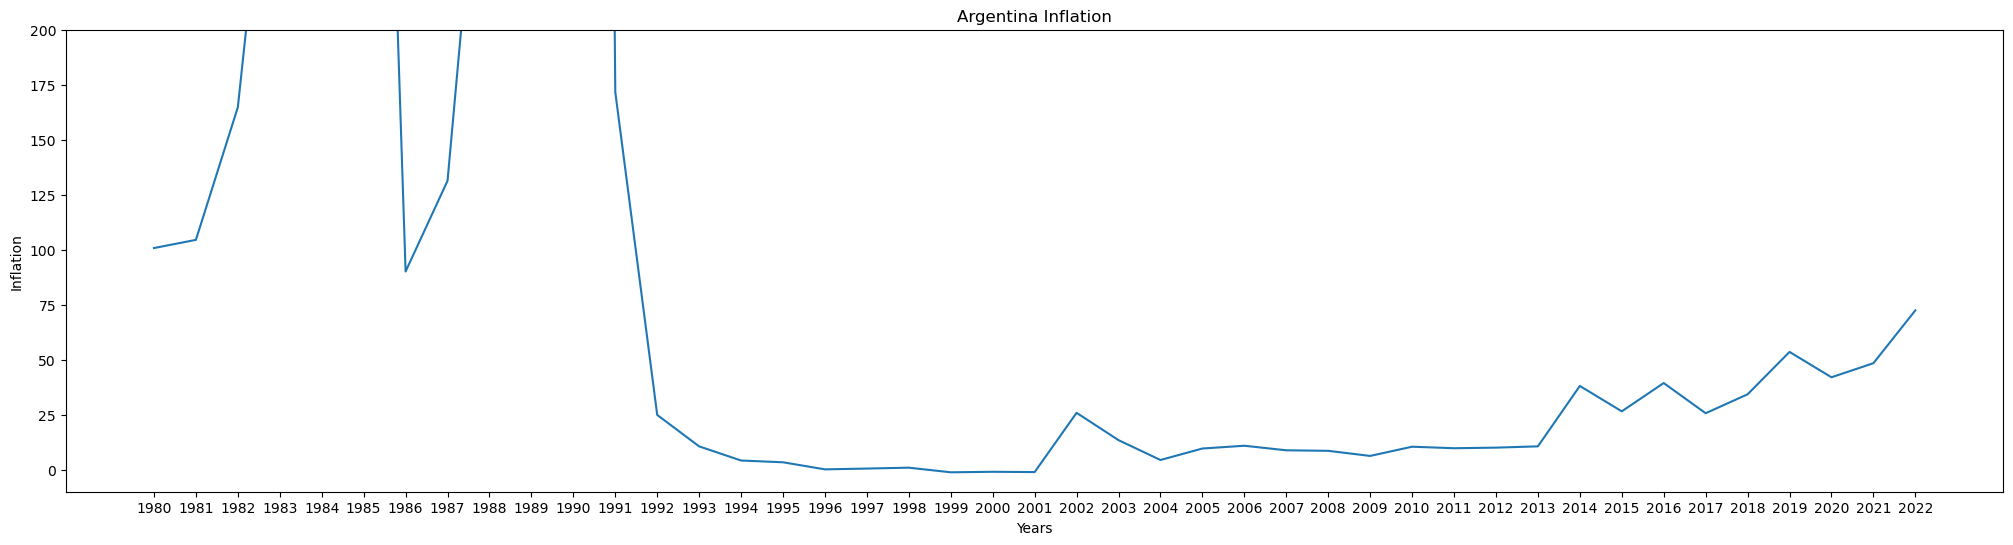

In [25]:
plt.figure(figsize=(25, 6))

plt.plot(Argentinas.iloc[:, 2:].columns, Argentinas.iloc[:, 2:].values[0])
plt.plot()

plt.xlabel("Years")
plt.ylabel("Inflation")
plt.ylim(bottom=-10, top=200)

plt.title("Argentina Inflation")

plt.show()

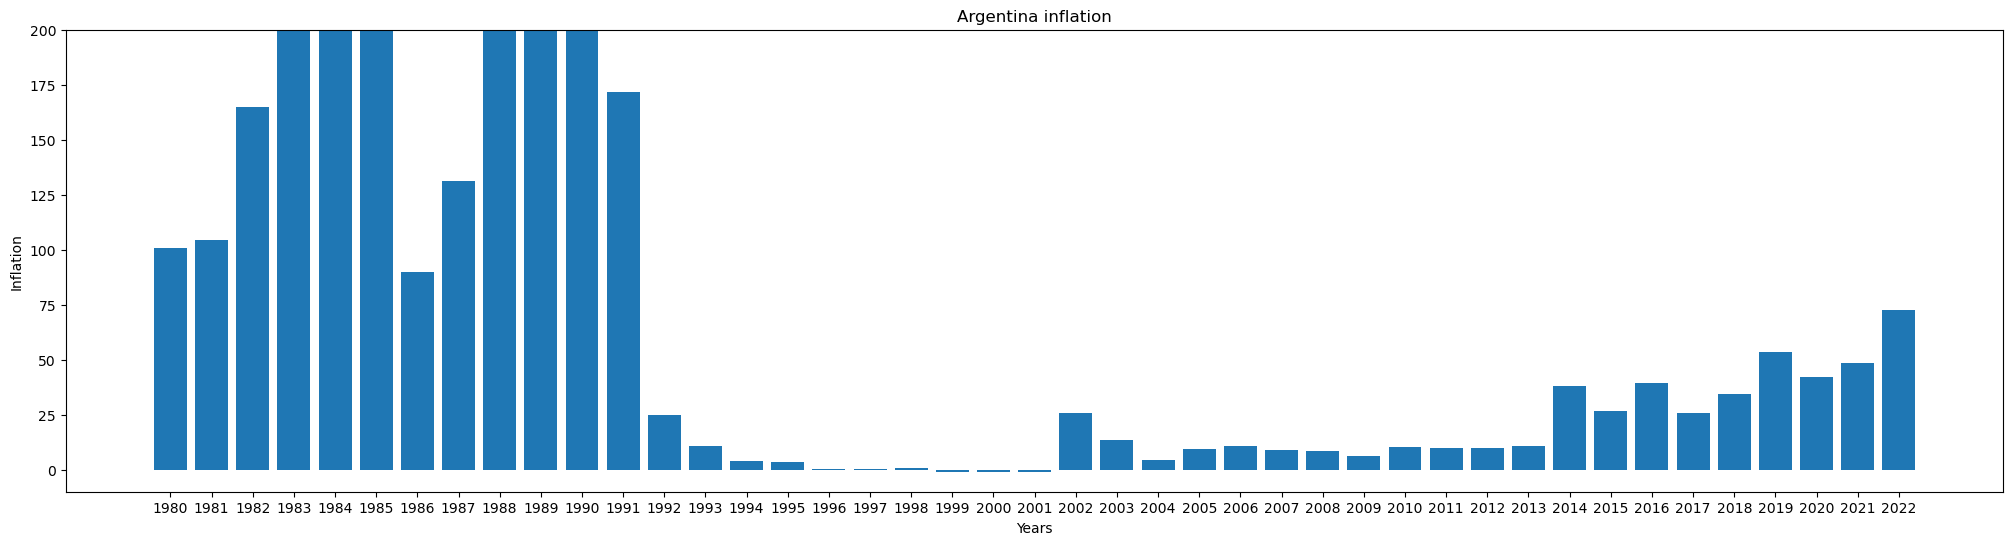

In [26]:
plt.figure(figsize=(25, 6))

plt.bar(Argentinas.iloc[:, 2:].columns, Argentinas.iloc[:, 2:].values[0])

plt.xlabel("Years")
plt.ylabel("Inflation")
plt.ylim(bottom=-10, top=200)

plt.title("Argentina inflation")

plt.show()

---

<font style="color: green; font-size: 35px">Save changes</font>

In [27]:
CPIa.to_csv("Inflation.csv")

In [28]:
CPIa

,Country,Code,1970,1971,1972,1973,1974,1975,1976,1977,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Angola,AGO,7.97,5.78,15.80,15.67,27.42,29.00,80.70,69.01,...,8.78,7.30,9.16,32.38,29.84,19.63,17.08,21.02,23.85,21.35
1,United Arab Emirates,ARE,21.98,21.98,21.98,21.98,21.98,21.98,21.98,21.97,...,1.09,2.34,4.07,1.62,1.97,3.06,-1.93,-2.08,0.18,5.22
2,Argentina,ARG,13.59,34.73,58.45,61.25,23.47,182.93,443.97,176.00,...,10.62,38.08,26.54,39.40,25.68,34.28,53.55,42.02,48.41,72.43
3,Antigua and Barbuda,ATG,8.87,8.63,12.67,21.72,12.97,8.61,15.62,13.75,...,1.06,1.09,0.97,-0.49,2.42,1.21,1.48,1.06,1.63,8.52
4,Australia,AUS,3.44,6.14,6.02,9.09,15.42,15.16,13.32,12.31,...,2.45,2.49,1.51,1.28,1.97,1.91,1.61,0.85,2.82,6.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Timor-Leste,TLS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.99,0.85,0.65,-1.47,0.52,2.29,0.96,NaN,NaN,NaN
197,Turks and Caicos Islands,TCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.50,2.30,2.20,2.00,2.10,2.10,2.20,2.30,NaN,NaN
198,South Sudan,SSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.04,1.66,52.81,379.85,187.87,83.49,51.19,29.68,30.23,17.60
199,Liechtenstein,LIE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.30,0.00,-1.11,-0.41,0.51,0.92,0.40,-0.70,0.51,2.83
